In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, List

def plot_channel_metrics(
    metrics_array: np.ndarray,
    save_dir: str = "./results/metrics_plots",
    mode: str = "subplots",
    channel_names: Optional[List[str]] = None,
    colors: Optional[List[str]] = None,
    figsize: tuple = (12, 6),
    dpi: int = 300,
    format: str = "png"
) -> None:
    """
    可视化通道指标数据（支持分通道子图/同图叠加模式）

    参数:
        metrics_array : np.ndarray - 形状为 (3, N) 的指标数据数组
        save_dir      : str        - 结果保存目录（默认：'./results/metrics_plots'）
        mode          : str        - 绘图模式：'subplots'（分通道子图）或 'combined'（同图叠加）
        channel_names : List[str] - 通道名称列表（长度3，默认：['Channel 0', 'Channel 1', 'Channel 2']）
        colors        : List[str] - 各通道颜色代码列表（长度3）
        figsize       : tuple      - 画布尺寸 (宽, 高)
        dpi           : int        - 图像分辨率（默认300）
        format        : str        - 图像格式（默认'png'）

    返回:
        None (结果图保存至指定目录)
    """
    # 参数校验
    assert metrics_array.ndim == 2 and metrics_array.shape[0] == 3, \
        "输入数据形状需为 (3, N)"
    assert mode in ["subplots", "combined"], \
        "模式需为 'subplots' 或 'combined'"
    
    # 设置默认参数
    if channel_names is None:
        channel_names = [f"Channel {i}" for i in range(3)]
    if colors is None:
        colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # matplotlib默认颜色
    
    # 创建保存目录
    os.makedirs(save_dir, exist_ok=True)
    
    # 根据模式绘图
    plt.ioff()  # 关闭交互模式
    if mode == "subplots":
        # 分通道子图模式
        fig, axes = plt.subplots(
            3, 1, 
            figsize=(figsize[0], figsize[1]*1.2),  # 增加高度适应子图
            sharex=True
        )
        fig.suptitle("Channel-wise Metrics Analysis", fontsize=14, y=1.02)
        
        for i, (ax, data, name, color) in enumerate(zip(axes, metrics_array, channel_names, colors)):
            ax.plot(data, color=color, linewidth=1.2, label=name)
            ax.set_ylabel("Value", fontsize=10)
            ax.legend(loc="upper right")
            ax.grid(True, linestyle="--", alpha=0.6)
            ax.set_xlim(0, len(data)-1)
            
        plt.xlabel("Sample Index", fontsize=12)
        plt.tight_layout()
        
    else:
        # 同图叠加模式
        plt.figure(figsize=figsize)
        for i, (data, name, color) in enumerate(zip(metrics_array, channel_names, colors)):
            plt.plot(data, color=color, linewidth=1.0, label=name)
            
        plt.title("Channel Metrics Comparison", fontsize=14)
        plt.xlabel("Sample Index", fontsize=12)
        plt.ylabel("Value", fontsize=12)
        plt.legend(loc="upper right", framealpha=0.9)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.xlim(0, metrics_array.shape[1]-1)
        plt.tight_layout()
    plt.show()

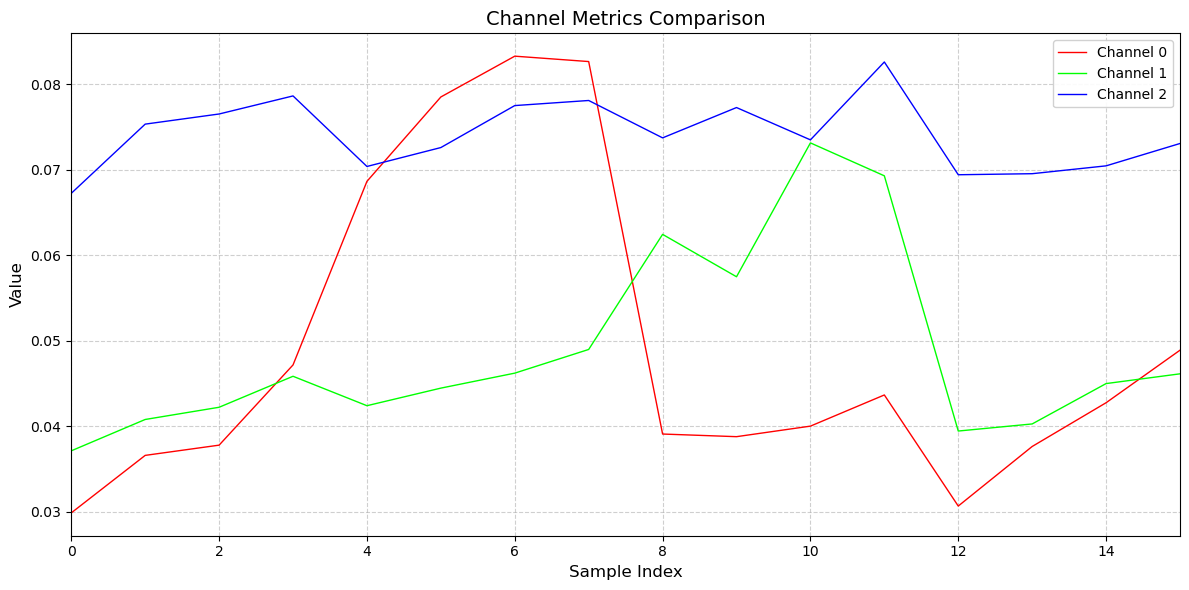

In [6]:
# 同图叠加模式
dummy_data=np.load("./results/metrics/rmse.npy")
plot_channel_metrics(
        dummy_data,
        save_dir="./plots/combined_demo",
        mode="combined",
        colors=["#FF0000", "#00FF00", "#0000FF"],  # RGB三色
        format="jpg"
    )

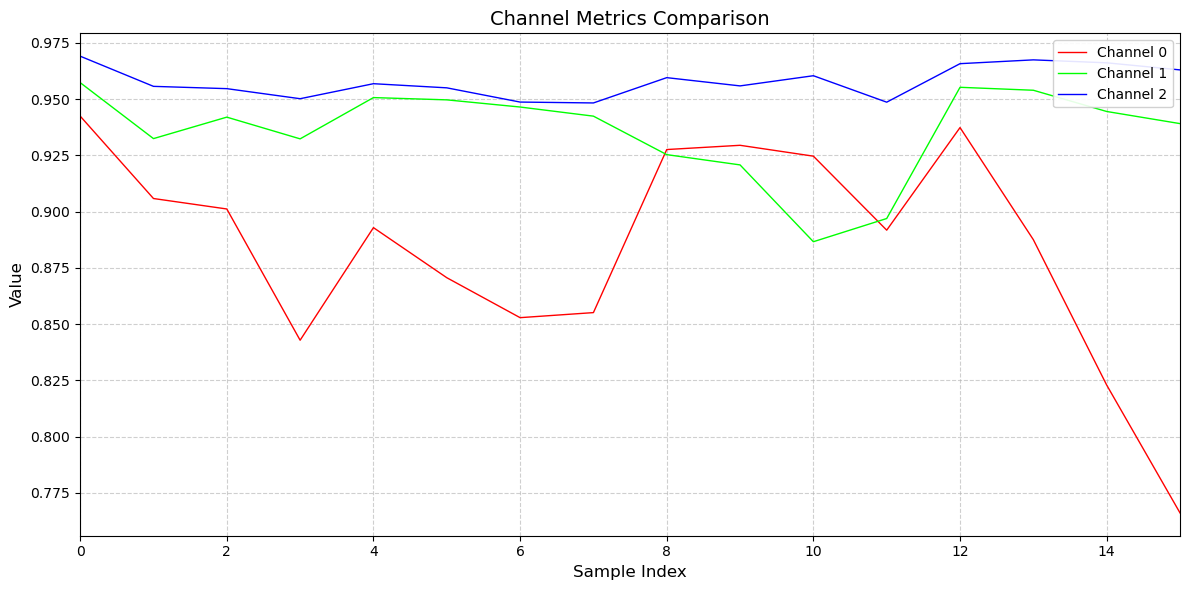

In [7]:
# 同图叠加模式
dummy_data=np.load("./results/metrics/r2.npy")
plot_channel_metrics(
        dummy_data,
        save_dir="./plots/combined_demo",
        mode="combined",
        colors=["#FF0000", "#00FF00", "#0000FF"],  # RGB三色
        format="jpg"
    )